In [13]:
import pandas as pd
movies = pd.read_csv('movies.dat', sep='::', names=['MovieNo','Title', 'Genres'], engine='python', encoding='latin1')
ratings = pd.read_csv('ratings.dat',  sep='::', names= ['MovieID','Rating', 'Timestamp' ], engine='python', encoding='latin1')
users = pd.read_csv('users.dat', sep='::', names=['UserId', 'Sex', 'Age', 'Occupation', 'Zip-code'], engine='python', encoding='latin1')

In [14]:
# Drop rows with missing values
movies.dropna(inplace=True)

# Display the first few rows
movies.head()

,MovieNo,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
# Drop rows with missing values
ratings.dropna(inplace=True)

# Display the first few rows
ratings.head()

,MovieID,Rating,Timestamp
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291


In [16]:
# Drop rows with missing values
users.dropna(inplace=True)

# Display the first few rows
users.head()

,UserId,Sex,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [17]:
# Merge User and Ratings data on 'MovieID'
user_ratings = users.merge(ratings, left_on='UserId', right_on='MovieID')

# Display the merged DataFrame
user_ratings

,UserId,Sex,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1,5,978824268
1,1,F,1,10,48067,1,4,978237008
2,1,F,1,10,48067,1,4,978233496
3,1,F,1,10,48067,1,5,978225952
4,1,F,1,10,48067,1,5,978226474
...,...,...,...,...,...,...,...,...
1000204,3952,F,45,1,12449,3952,4,992072099
1000205,3952,F,45,1,12449,3952,3,986223125
1000206,3952,F,45,1,12449,3952,4,1011902656
1000207,3952,F,45,1,12449,3952,1,979852537


In [18]:
# Merge User_ratings with movies_df based on 'MovieID' and 'MovieNo'
df = user_ratings.merge(movies, left_on='MovieID', right_on='MovieNo')

# Display the final merged DataFrame
df

,UserId,Sex,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,MovieNo,Title,Genres
0,1,F,1,10,48067,1,5,978824268,1,Toy Story (1995),Animation|Children's|Comedy
1,1,F,1,10,48067,1,4,978237008,1,Toy Story (1995),Animation|Children's|Comedy
2,1,F,1,10,48067,1,4,978233496,1,Toy Story (1995),Animation|Children's|Comedy
3,1,F,1,10,48067,1,5,978225952,1,Toy Story (1995),Animation|Children's|Comedy
4,1,F,1,10,48067,1,5,978226474,1,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3952,F,45,1,12449,3952,4,992072099,3952,"Contender, The (2000)",Drama|Thriller
1000205,3952,F,45,1,12449,3952,3,986223125,3952,"Contender, The (2000)",Drama|Thriller
1000206,3952,F,45,1,12449,3952,4,1011902656,3952,"Contender, The (2000)",Drama|Thriller
1000207,3952,F,45,1,12449,3952,1,979852537,3952,"Contender, The (2000)",Drama|Thriller


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserId      1000209 non-null  int64 
 1   Sex         1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   Zip-code    1000209 non-null  object
 5   MovieID     1000209 non-null  int64 
 6   Rating      1000209 non-null  int64 
 7   Timestamp   1000209 non-null  int64 
 8   MovieNo     1000209 non-null  int64 
 9   Title       1000209 non-null  object
 10  Genres      1000209 non-null  object
dtypes: int64(7), object(4)
memory usage: 91.6+ MB


In [20]:
df.describe()

,UserId,Age,Occupation,MovieID,Rating,Timestamp,MovieNo
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.048282e+01,8.176733e+00,1.865540e+03,3.581564e+00,9.722437e+08,1.865540e+03
std,1.096041e+03,1.326605e+01,6.272765e+00,1.096041e+03,1.117102e+00,1.215256e+07,1.096041e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00
25%,1.030000e+03,2.500000e+01,3.000000e+00,1.030000e+03,3.000000e+00,9.653026e+08,1.030000e+03
50%,1.835000e+03,2.500000e+01,7.000000e+00,1.835000e+03,4.000000e+00,9.730180e+08,1.835000e+03
75%,2.770000e+03,3.500000e+01,1.400000e+01,2.770000e+03,4.000000e+00,9.752209e+08,2.770000e+03
max,3.952000e+03,5.600000e+01,2.000000e+01,3.952000e+03,5.000000e+00,1.046455e+09,3.952000e+03


In [21]:
df.isnull().sum()

UserId        0
Sex           0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Rating        0
Timestamp     0
MovieNo       0
Title         0
Genres        0
dtype: int64

In [22]:
# 2. Convert Timestamp to a readable date-time format:

df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# 3. Ensure data types are consistent:
# Ensure Rating is numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Ensure Title and Genres are strings
df['Title'] = df['Title'].astype(str)
df['Genres'] = df['Genres'].astype(str)

# 4. Remove duplicates:
df.drop_duplicates(inplace=True)

# Display the cleaned data
df.head()

,UserId,Sex,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,MovieNo,Title,Genres
0,1,F,1,10,48067,1,5,2001-01-06 23:37:48,1,Toy Story (1995),Animation|Children's|Comedy
1,1,F,1,10,48067,1,4,2000-12-31 04:30:08,1,Toy Story (1995),Animation|Children's|Comedy
2,1,F,1,10,48067,1,4,2000-12-31 03:31:36,1,Toy Story (1995),Animation|Children's|Comedy
3,1,F,1,10,48067,1,5,2000-12-31 01:25:52,1,Toy Story (1995),Animation|Children's|Comedy
4,1,F,1,10,48067,1,5,2000-12-31 01:34:34,1,Toy Story (1995),Animation|Children's|Comedy


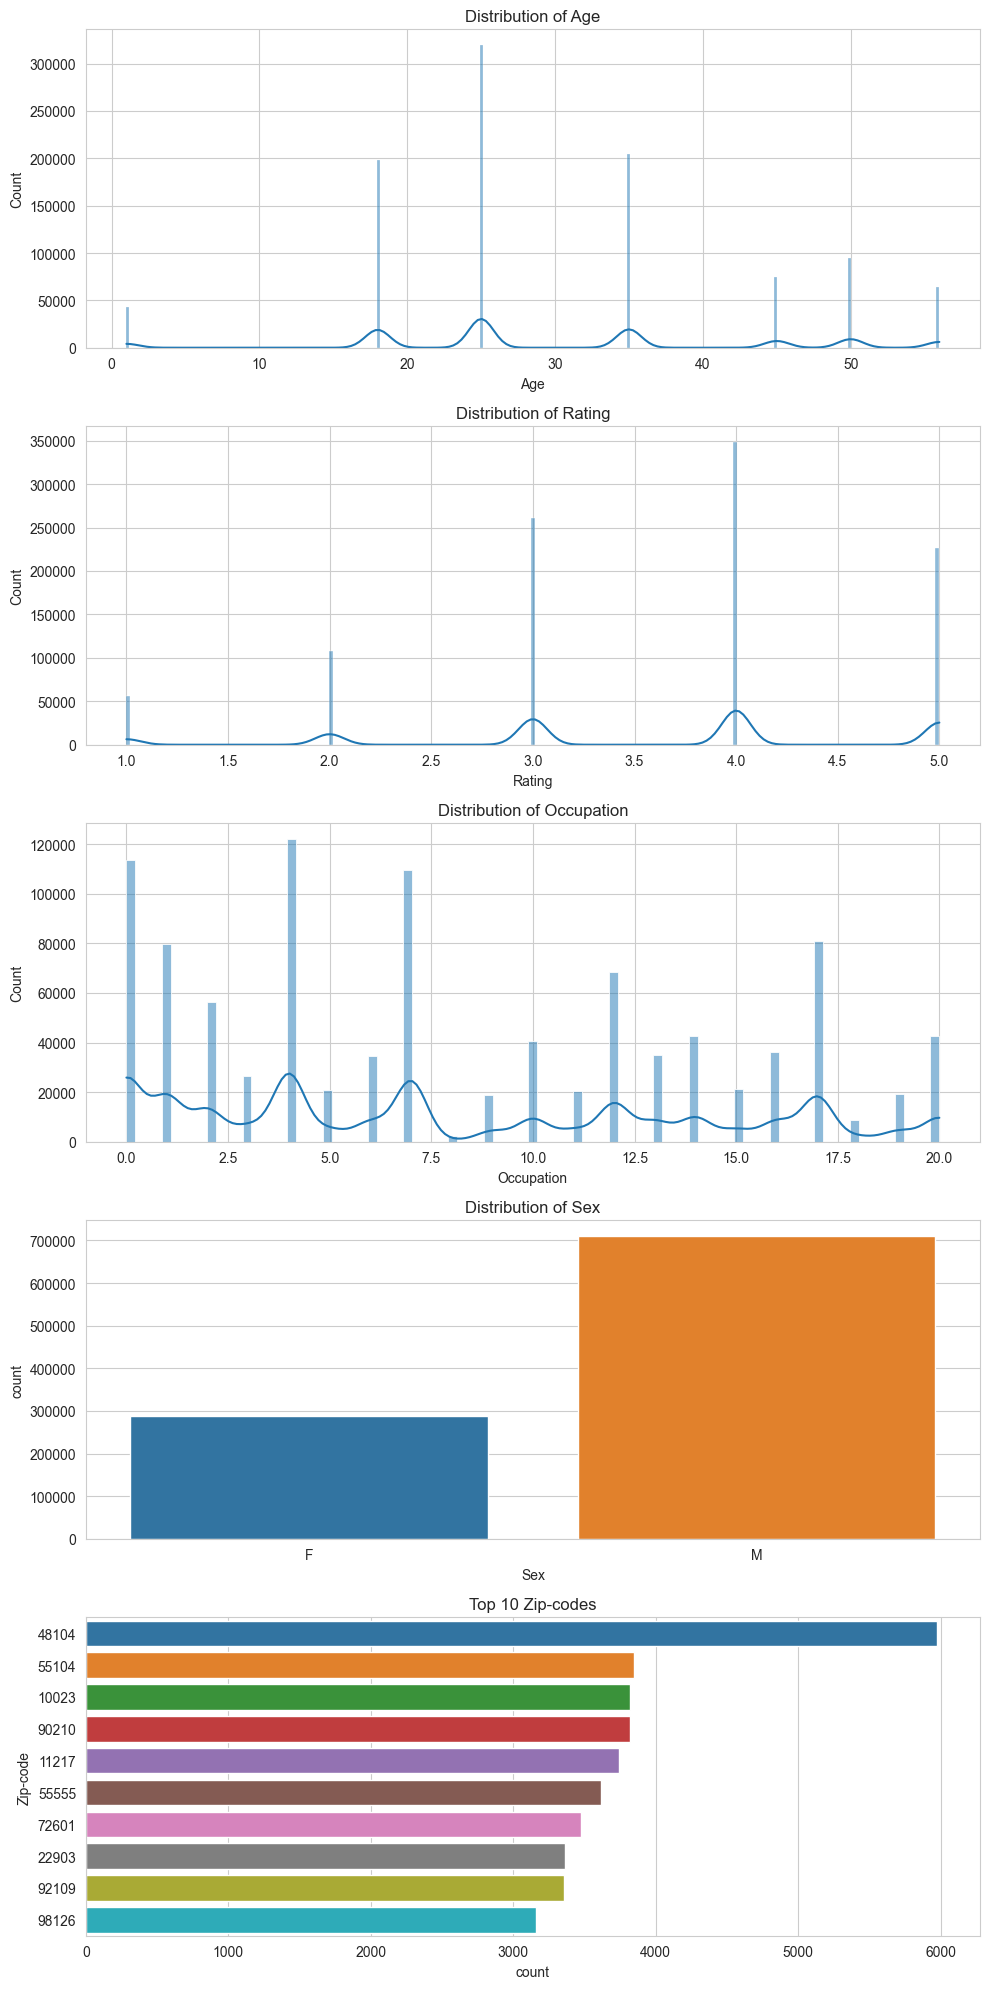

Average rating per movie:
 Title
$1,000,000 Duck (1971)           3.027027
'Night Mother (1986)             3.371429
'Til There Was You (1997)        2.692308
'burbs, The (1989)               2.910891
...And Justice for All (1979)    3.713568
Name: Rating, dtype: float64

Average rating per user:
 UserId
1    4.146917
2    3.201141
3    3.016736
4    2.729412
5    3.006757
Name: Rating, dtype: float64


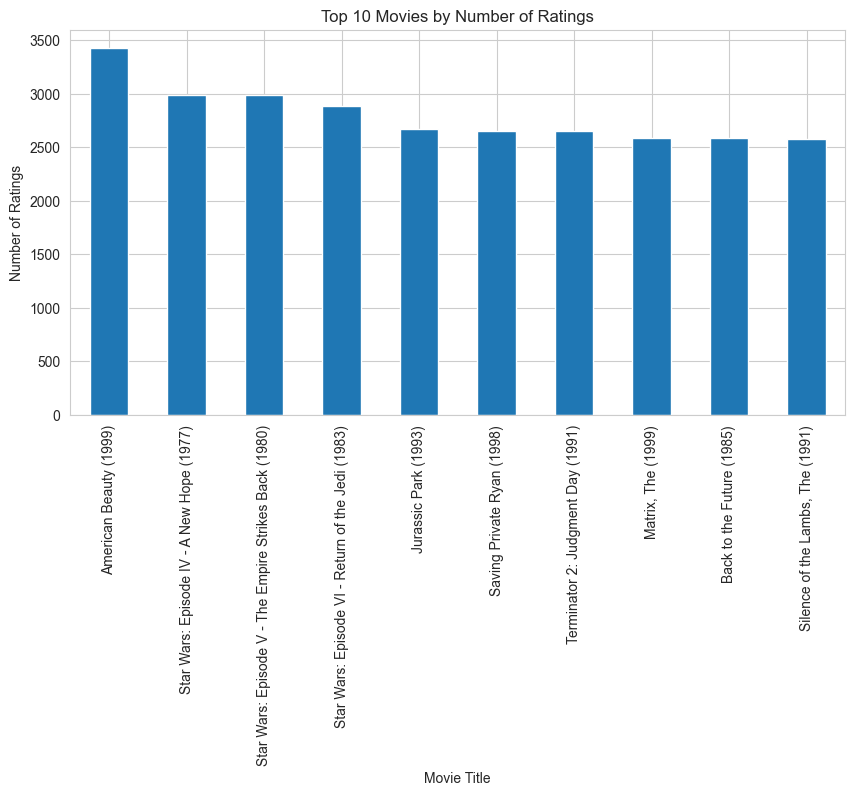

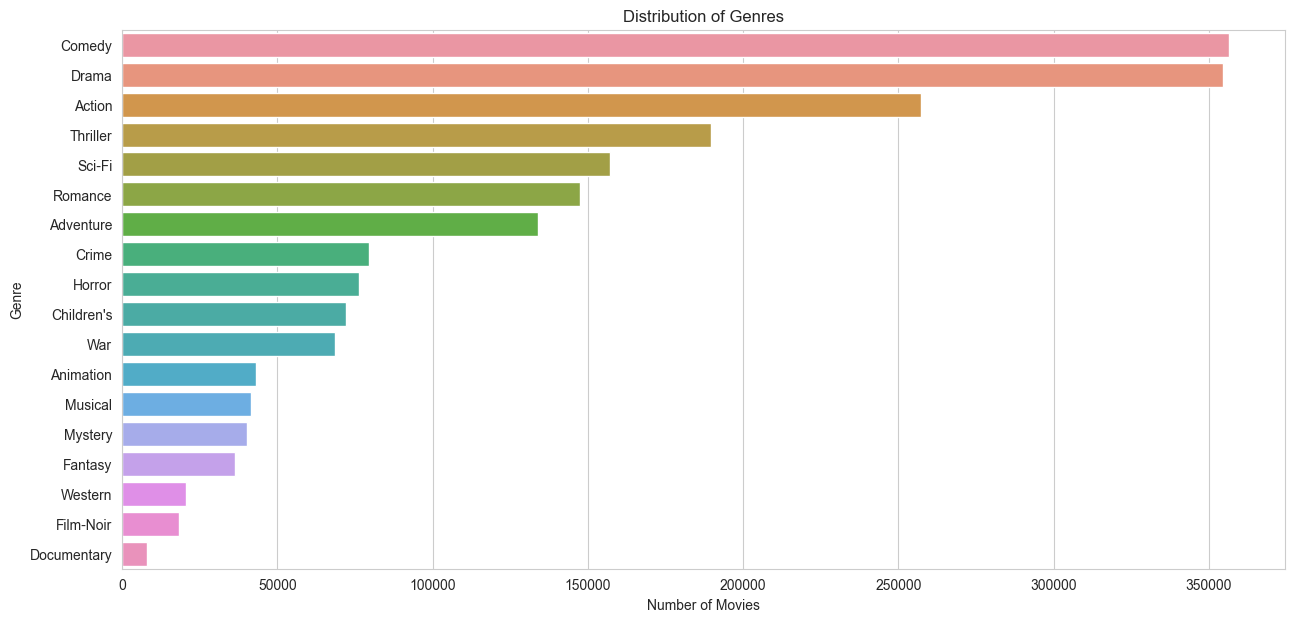

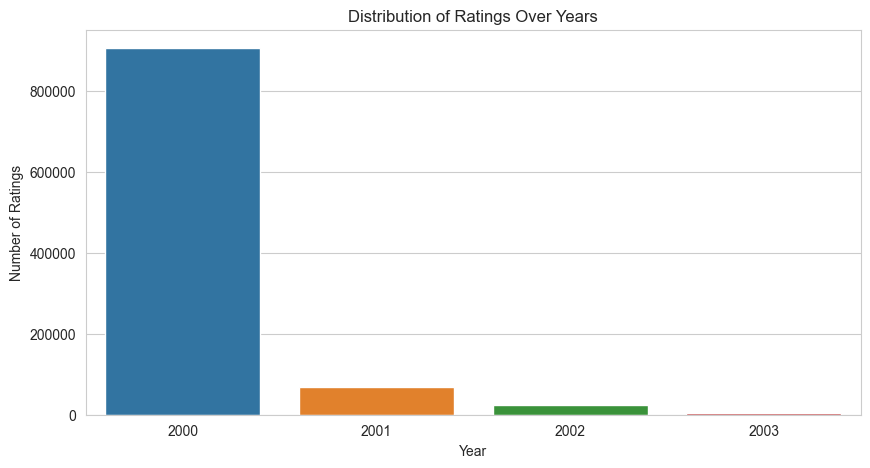

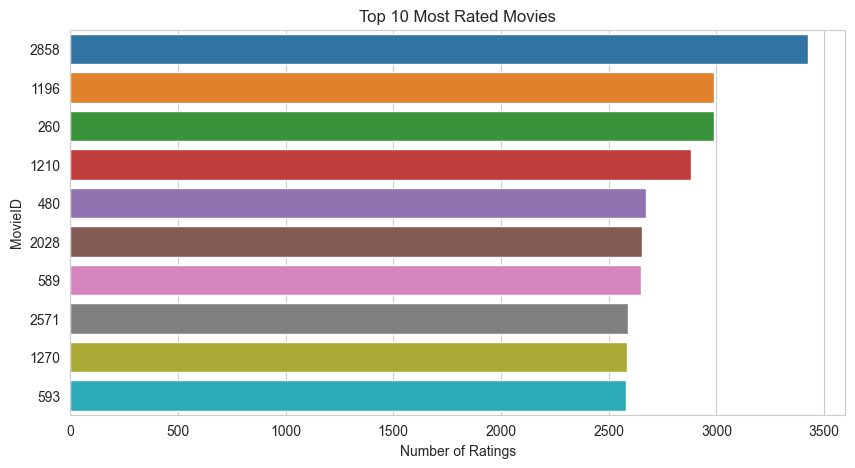

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've loaded your dataset into a DataFrame called 'df'
# df = pd.read_csv('path_to_your_dataset.csv')

# Set the style for seaborn plots
sns.set_style("whitegrid")

# 1. Distribution of Age, Rating, Occupation:
fig, ax = plt.subplots(5, 1, figsize=(10, 20))

sns.histplot(df['Age'], ax=ax[0], kde=True)
ax[0].set_title('Distribution of Age')

sns.histplot(df['Rating'], ax=ax[1], kde=True)
ax[1].set_title('Distribution of Rating')

sns.histplot(df['Occupation'], ax=ax[2], kde=True)
ax[2].set_title('Distribution of Occupation')

sns.countplot(data=df, x='Sex', ax=ax[3])
ax[3].set_title('Distribution of Sex')

top_zip_codes = df['Zip-code'].value_counts().head(10).index
sns.countplot(data=df, y='Zip-code', order=top_zip_codes, ax=ax[4])
ax[4].set_title('Top 10 Zip-codes')

plt.tight_layout()
plt.show()

# 2. Average ratings per movie, per user:
avg_rating_per_movie = df.groupby('Title')['Rating'].mean()
avg_rating_per_user = df.groupby('UserId')['Rating'].mean()

print("Average rating per movie:\n", avg_rating_per_movie.head())
print("\nAverage rating per user:\n", avg_rating_per_user.head())

# 3. Number of ratings per movie:
ratings_count_per_movie = df.groupby('Title')['Rating'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ratings_count_per_movie.head(10).plot(kind='bar')
plt.title('Top 10 Movies by Number of Ratings')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.show()

# 4. Distribution of Genres:
all_genres = df['Genres'].str.split('|', expand=True).stack()
plt.figure(figsize=(15, 7))
sns.countplot(y=all_genres, order=all_genres.value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# 5. Distribution of Timestamp:
df['Year'] = df['Timestamp'].dt.year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year')
plt.title('Distribution of Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()

# 6. Most rated movies:
top_rated_movies = df['MovieID'].value_counts().head(10).index
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='MovieID', order=top_rated_movies)
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('MovieID')
plt.show()


In [24]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

class SVDMovieRecommender:
    def __init__(self):
        self.model = SVD()
        self.trainset = None
        self.testset = None
        self.movie_id_to_name = {}
        self.movie_name_to_id = {}

    def fit(self, df):
        reader = Reader(rating_scale=(df['Rating'].min(), df['Rating'].max()))
        data = Dataset.load_from_df(df[['UserId', 'MovieID', 'Rating']], reader)
        
        # Splitting the data into training and test sets
        self.trainset, self.testset = train_test_split(data, test_size=0.25, random_state=42)
        
        self.model.fit(self.trainset)

        # Create mapping from MovieID to Title and vice-versa
        self.movie_id_to_name = pd.Series(df.Title.values, index=df.MovieID).to_dict()
        self.movie_name_to_id = pd.Series(df.MovieID.values, index=df.Title).to_dict()

    def predict(self, user_id, movie_name):
        movie_id = self.movie_name_to_id[movie_name]
        return self.model.predict(user_id, movie_id).est

    def evaluate(self):
        predictions = self.model.test(self.testset)
        rmse = accuracy.rmse(predictions)
        return rmse

# Usage
recommender = SVDMovieRecommender()
recommender.fit(df)

# Evaluation
rmse = recommender.evaluate()
print(f"Root Mean Square Error (RMSE) for SVD: {rmse:.2f}")



RMSE: 0.9799
Root Mean Square Error (RMSE) for SVD: 0.98


In [28]:
# Prediction
user_id = input("Enter user ID: ")
movie_name = input("Enter movie name: ")
print(f"SVD Prediction for User {user_id} and Movie '{movie_name}': {recommender.predict(user_id, movie_name)}")


SVD Prediction for User 1 and Movie 'Toy Story (1995)': 3.854594687714037
